In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [19]:
sfwtab = pd.read_csv(r'sfw_T_0-0c2_U_0-7_nu_eq_3', index_col=0)


In [20]:
#sfwtab = pd.concat((sfwtab_5,sfwtab_6, sfwtab_7), ignore_index=True)
#sfwtab=sfwtab


In [21]:
sfwtab.head()

,U,T,mu,nu,sq_det_SFW,convsfw,SFW_ten,SFWxx,SFWxy,delta0,delta1,ns0,ns1,deltaError,nError
0,0.0001,0.000000,(-5.0005709558410156e-05-1.0137426380091317e-38j),(3.0007391678836175+3.224169632743921e-34j),(2.817042868115744e-05+1.6998403107627307e-22j),(2.042606522888681e-10+3.9942257306325325e-54j),[[ 2.81704287e-05+1.69984031e-22j -7.14737541e...,(2.8170428681155128e-05+1.6998403107465334e-22j),(-7.147375410090382e-18+7.915528399550714e-34j),(3.941506957274933e-06-4.2925359380958586e-35j),(0.2500018981002074-2.0614673315041084e-29j),(0.9999999915678013-3.834599711758475e-41j),(1.000369588157908+1.612085008101946e-34j),4.942486e-08,0.000095
1,0.0001,0.004082,(-5.0436599806096056e-05+2.582461225717205e-31j),(3.000053296027188-2.2466968884496613e-26j),(2.917073084619422e-17-5.7491335126653755e-25j),(1.0524261253188092e-26+2.8266422852495476e-61j),[[2.94665560e-17-1.23826424e-25j 4.06899508e-1...,(2.9466555950355356e-17-1.238264241579818e-25j),(4.0689950774924383e-19+2.5193612928206016e-25j),(8.62099958181263e-10+8.397184496801416e-33j),(9.324401279561735e-10-1.3439325251745894e-28j),(0.9999999978226866-2.1110917848884617e-34j),(1.0000266491022507-1.1233484336693716e-26j),7.692058e-09,0.000096
2,0.0001,0.008163,(-5.043326225880972e-05-7.633345249199207e-31j),(3.0000265010857747+6.699451658930044e-26j),(5.870379431725108e-17-7.317535389219487e-27j),(1.0132144467935118e-26+5.191161047499529e-60j),[[-5.88338154e-17+1.10677865e-28j -4.27649598e...,(-5.883381541871894e-17+1.1067786464316955e-28j),(-4.276495975847256e-19-1.9551929347084397e-28j),(8.620704446374671e-10-8.959760179499816e-32j),(8.987234659062008e-10-1.6019270039552036e-26j),(0.9999999975876672+6.480549721872937e-34j),(1.0000132517490539+3.3497257970622733e-26j),7.579326e-09,0.000048
3,0.0001,0.012245,(-4.892029163352089e-05+1.3561350674188158e-31j),(2.999955864326921-1.6951445745047455e-26j),(2.211405592751738e-17-3.4154358121108227e-26j),(1.1080663691059993e-25+1.6877293703170485e-57j),[[-2.20222150e-17+3.85657214e-27j 3.98765176e...,(-2.2022215025031287e-17+3.856572143355541e-27j),(3.9876517573687726e-19-2.7223498315484085e-26j),(2.873296052040507e-09-1.2271877160190558e-31j),(2.9497587878321897e-09+5.876271564580484e-27j),(0.9999999908419338-8.286212821537331e-34j),(0.9999779367424935-8.475722458213087e-27j),2.510002e-08,0.000079
4,0.0001,0.016327,(-4.89216772130472e-05-9.158029406571661e-32j),(2.9999669128110114-3.691450429504041e-27j),(6.346701656173501e-18+1.3089127876627762e-26j),(1.1012376578015136e-25-4.712261502967558e-56j),[[-6.88689936e-18-7.37101427e-27j 2.10148553e...,(-6.886899358379346e-18-7.371014273736469e-27j),(2.1014855338391845e-20+1.6170173521538425e-27j),(2.8732588503081385e-09-8.563387222806245e-32j),(2.9316160345048237e-09-7.355709447371156e-27j),(0.9999999908085466-4.451405099209767e-34j),(0.9999834610012324-1.8457249921817655e-27j),2.503878e-08,0.000059


In [28]:
s1 = len(sfwtab['U'].unique())
s2 = len(sfwtab['T'].unique())

In [36]:
Tarr = np.zeros((s1,s2))
sfwarr = np.zeros((s1,s2))
csfwarr = np.zeros((s1,s2))
for i,Uv in enumerate(sfwtab.U.unique()):
    Tarr[i]=np.array(sfwtab['T'].loc[sfwtab.U==Uv])
    sfwarr[i]=np.array(sfwtab.sq_det_SFW.loc[sfwtab.U==Uv], dtype=complex)
    csfwarr[i] = np.array(sfwtab.convsfw.loc[sfwtab.U==Uv], dtype=complex)
    

C:\Users\atsch\AppData\Local\Temp\ipykernel_6352\1949909337.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  sfwarr[i]=np.array(sfwtab.sq_det_SFW.loc[sfwtab.U==Uv], dtype=complex)
C:\Users\atsch\AppData\Local\Temp\ipykernel_6352\1949909337.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  csfwarr[i] = np.array(sfwtab.convsfw.loc[sfwtab.U==Uv], dtype=complex)


In [65]:
sfwtab['T'].loc[sfwtab.U==Uv]

0     0.000000
1     0.004082
2     0.008163
3     0.012245
4     0.016327
5     0.020408
6     0.024490
7     0.028571
8     0.032653
9     0.036735
10    0.040816
11    0.044898
12    0.048980
13    0.053061
14    0.057143
15    0.061224
16    0.065306
17    0.069388
18    0.073469
19    0.077551
20    0.081633
21    0.085714
22    0.089796
23    0.093878
24    0.097959
25    0.102041
26    0.106122
27    0.110204
28    0.114286
29    0.118367
30    0.122449
31    0.126531
32    0.130612
33    0.134694
34    0.138776
35    0.142857
36    0.146939
37    0.151020
38    0.155102
39    0.159184
40    0.163265
41    0.167347
42    0.171429
43    0.175510
44    0.179592
45    0.183673
46    0.187755
47    0.191837
48    0.195918
49    0.200000
Name: T, dtype: float64

In [87]:
T_Bkt = []
for i,Uv in enumerate(sfwtab.U.unique()):
   
    T_Bkt.append(np.array(sfwtab['T'].loc[np.abs(np.array(sfwtab.sq_det_SFW, dtype=complex)-(sfwtab['T'])*8/np.pi)<1e-2].loc[sfwtab.U==Uv]))

In [ ]:
U = np.array(sfwtab.U)
if 'T' in sfwtab.columns:
    T = np.array(sfwtab['T'])
mu=np.array(sfwtab.mu, dtype=complex)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)
convsfw = np.array(sfwtab.convsfw, dtype=complex)
sfwxx = np.array(sfwtab.SFWxx, dtype=complex)


In [96]:
Tbkt = [i[0] for i in T_Bkt]

In [98]:
len(Tbkt)

16

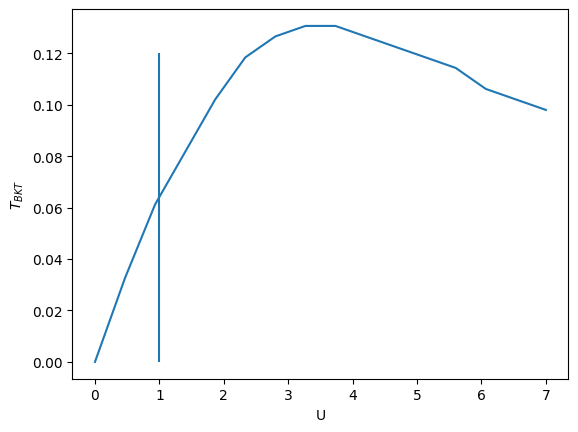

In [103]:
plt.xlabel('U')
plt.ylabel(r'$T_{BKT}$')
plt.plot(sfwtab.U.unique(),Tbkt)
plt.vlines(1,0,0.12)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


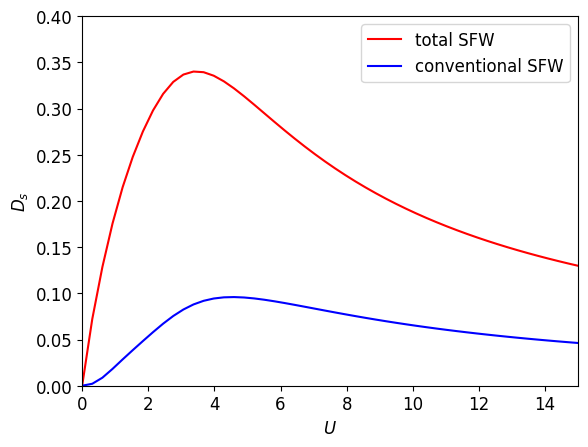

In [ ]:
#U dependence of sfw for fixed T
plt.xlabel(r'$U$', size='large')
plt.ylabel(r'$D_{s}$', size='large')
plt.xticks(size='large')
plt.yticks(size='large')
plt.ylim(0,0.4)
plt.xlim(0,15)
plt.plot(U, sdsfw, c='red', label='total SFW')
plt.plot(U, convsfw,c='blue', label='conventional SFW')
plt.legend(fontsize='large')
#plt.colorbar(label=r'$\nu$')

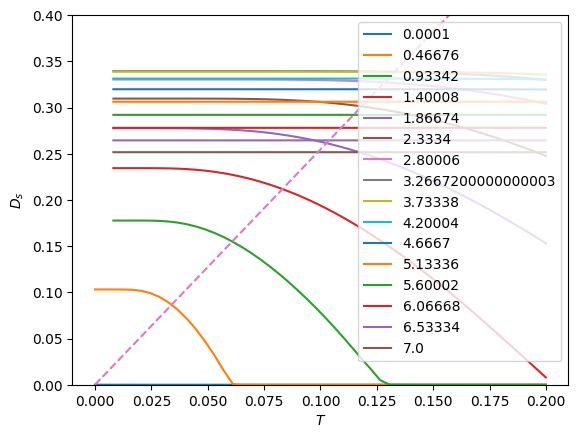

In [54]:
#Temperature dependence of sfw for fixed U

plt.xlabel(r'$T$')
plt.ylabel(r'$D_{s}}$')
plt.ylim(0,0.4)
#plt.xlim(0,15)
for i in range(s1)[:]:
    plt.plot(Tarr[i], sfwarr[i], label = sfwtab.U.unique()[i])
    #plt.plot(Tarr[i], csfwarr[i], label = sfwtab.U.unique()[i])
plt.plot(Tarr[0], Tarr[0]*8/np.pi, linestyle='--')
#plt.vlines(0.06, 0, 0.2)
plt.legend()

In [ ]:
sfwtab['T'].loc[(np.abs(complex(sfwtab.sq_det_SFW)-sfwtab['T']*8/np.pi)<1e-3)]

TypeError: unsupported operand type(s) for -: 'str' and 'float'

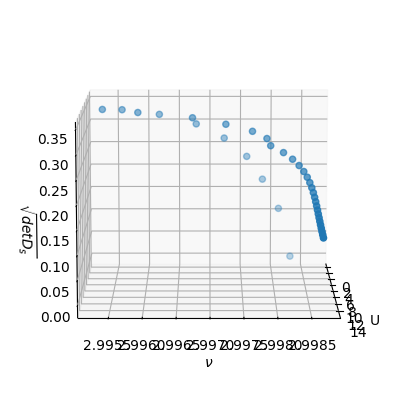

In [36]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()